# Feature Selection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.stat import Correlation

In [2]:
property_data_2022 = pd.read_csv('../data/raw/2022_final_merged.csv')
property_data_2022 = property_data_2022[property_data_2022['week_rent']!='No Available']
property_data_2022['week_rent'] = property_data_2022['week_rent'].astype('float')
property_data_2017_2021 = pd.read_csv('../data/raw/history_final_merged.csv')
property_data_2017_2021['week_rent'] = property_data_2017_2021['week_rent'].astype('float')
all_house = pd.concat([property_data_2017_2021,property_data_2022],axis = 0)
all_house = all_house.drop(columns=['real_distance','real_duration'])
all_house = all_house.dropna()
all_house = all_house[all_house['real_school_distance'] != 'school_distance_txt']
all_house = all_house[all_house['real_school_duration'] != 'school_duration_txt']
all_house = all_house[all_house['real_station_distance'] != 'school_station_txt']
all_house = all_house[all_house['real_station_duration'] != 'school_duration_txt']
all_house['real_school_distance'] = all_house['real_school_distance'].astype('float')
all_house['real_school_duration'] = all_house['real_school_duration'].astype('float')
all_house['real_station_distance'] = all_house['real_station_distance'].astype('float')
all_house['real_station_duration'] = all_house['real_station_duration'].astype('float')

# Draw a heatmap to have a brief knowledge about the correlation between features

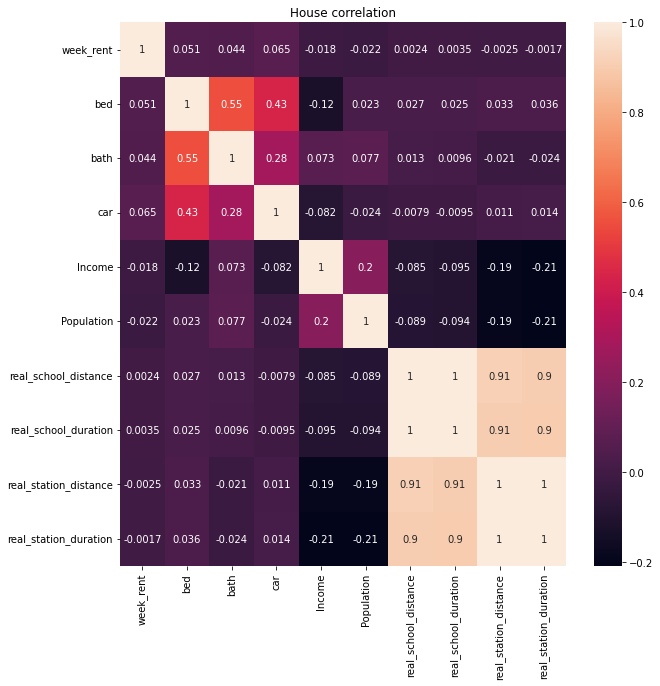

In [3]:
CORR_COLS=['week_rent','bed','bath','car','Income','Population','real_school_distance',
       'real_school_duration', 'real_station_distance',
       'real_station_duration']
f, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(all_house[CORR_COLS].corr(),annot=True)
plt.title('House correlation')
plt.show()

# Feature selection using Random Forest Method

In [4]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# 平均减少杂质（mean decrease impurity）
随机森林由许多决策树组成。决策树中的每个节点都是单个特性的一个条件，用于将数据集分成两个，以便类似的响应值最终出现在相同的集合中。选择局部最优条件的度量称为杂质。对于分类，它通常是基尼杂质或信息增益/熵，对于回归树是方差。因此，当训练树时，可以计算每个特征减少树中加权杂质的程度。对于森林，每个特征中的杂质减少量可以被平均，并且根据这个度量对特征进行排序。

In [27]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load boston housing dataset as an example
X = all_house[['years','postcode','bed','bath','car','Income','Population','real_school_distance',
       'real_school_duration', 'real_station_distance',
       'real_station_duration']]
Y = all_house['week_rent']
names = ['years','postcode','bed','bath','car','Income','Population','real_school_distance',
       'real_school_duration', 'real_station_distance',
       'real_station_duration']
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.1842, 'Population'), (0.1598, 'real_station_duration'), (0.1398, 'real_station_distance'), (0.1356, 'real_school_duration'), (0.125, 'real_school_distance'), (0.0587, 'Income'), (0.0548, 'bed'), (0.0503, 'car'), (0.0404, 'bath'), (0.0318, 'postcode'), (0.0196, 'years')]
